In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_confusion_matrix
from scipy.stats import zscore
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.cluster import KMeans

#### Etapa 3: 
##### Como paladar é uma questão “pessoal” o importador deseja trazer vinhos brancos dessa região, mas gostaria de ter uma variedade de tipos desses vinhos, como podemos auxiliá-los.  

In [2]:
wine_white = pd.read_csv("./winequality-white.csv", sep=";")

In [3]:
wine_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
wine_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [5]:
wine_white.columns = wine_white.columns.str.strip().str.replace(' ', '_').str.lower()

In [6]:
wine_white.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
wine_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   ph                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


##### 1.	Definição da variável resposta

In [8]:
X = wine_white.iloc[:, wine_white.columns != 'quality']

y = wine_white['quality']

In [9]:
X.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [10]:
y.head()

0    6
1    6
2    6
3    6
4    6
Name: quality, dtype: int64

##### 2.	Análise Exploratória dos dados

In [11]:
wine_white.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile_acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric_acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual_sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free_sulfur_dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total_sulfur_dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
ph,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


In [12]:
pd.DataFrame(zip(wine_white.isnull().sum(), wine_white.isnull().sum()/len(wine_white)), columns=['Count', 'Proportion'], index=wine_white.columns)

,Count,Proportion
fixed_acidity,0,0.0
volatile_acidity,0,0.0
citric_acid,0,0.0
residual_sugar,0,0.0
chlorides,0,0.0
free_sulfur_dioxide,0,0.0
total_sulfur_dioxide,0,0.0
density,0,0.0
ph,0,0.0
sulphates,0,0.0


In [13]:
(wine_white['quality'].count() / wine_white.shape[0]) * 100

100.0

<AxesSubplot:>

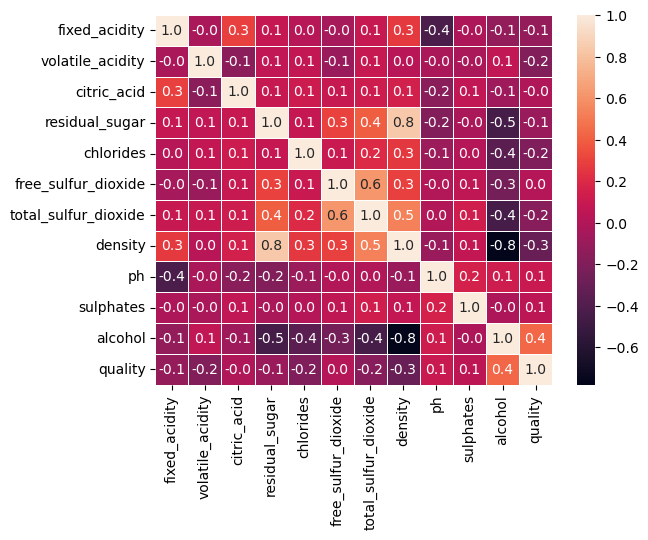

In [14]:
correlation = wine_white.corr()
plot = sns.heatmap(correlation, annot=True, fmt=".1f", linewidths=0.6)
plot

In [15]:
sfs = SFS(
    RandomForestClassifier(),
    k_features=10,
    forward=True,
    floating=False,
    scoring="r2",
    cv=0,
)

sfs.fit(X, y)


df_SFS_results = pd.DataFrame(sfs.subsets_).transpose()
print(df_SFS_results)

                        feature_idx              cv_scores avg_score  \
1                              (7,)  [0.11142695371667322]  0.111427   
2                            (6, 7)   [0.9190312870219413]  0.919031   
3                         (0, 6, 7)   [0.9992189513217551]  0.999219   
4                      (0, 1, 6, 7)                  [1.0]       1.0   
5                   (0, 1, 2, 6, 7)                  [1.0]       1.0   
6                (0, 1, 2, 3, 6, 7)                  [1.0]       1.0   
7             (0, 1, 2, 3, 4, 6, 7)                  [1.0]       1.0   
8          (0, 1, 2, 3, 4, 6, 7, 8)                  [1.0]       1.0   
9       (0, 1, 2, 3, 4, 6, 7, 8, 9)                  [1.0]       1.0   
10  (0, 1, 2, 3, 4, 6, 7, 8, 9, 10)                  [1.0]       1.0   

                                        feature_names  
1                                          (density,)  
2                     (total_sulfur_dioxide, density)  
3      (fixed_acidity, total_sulfur_dio

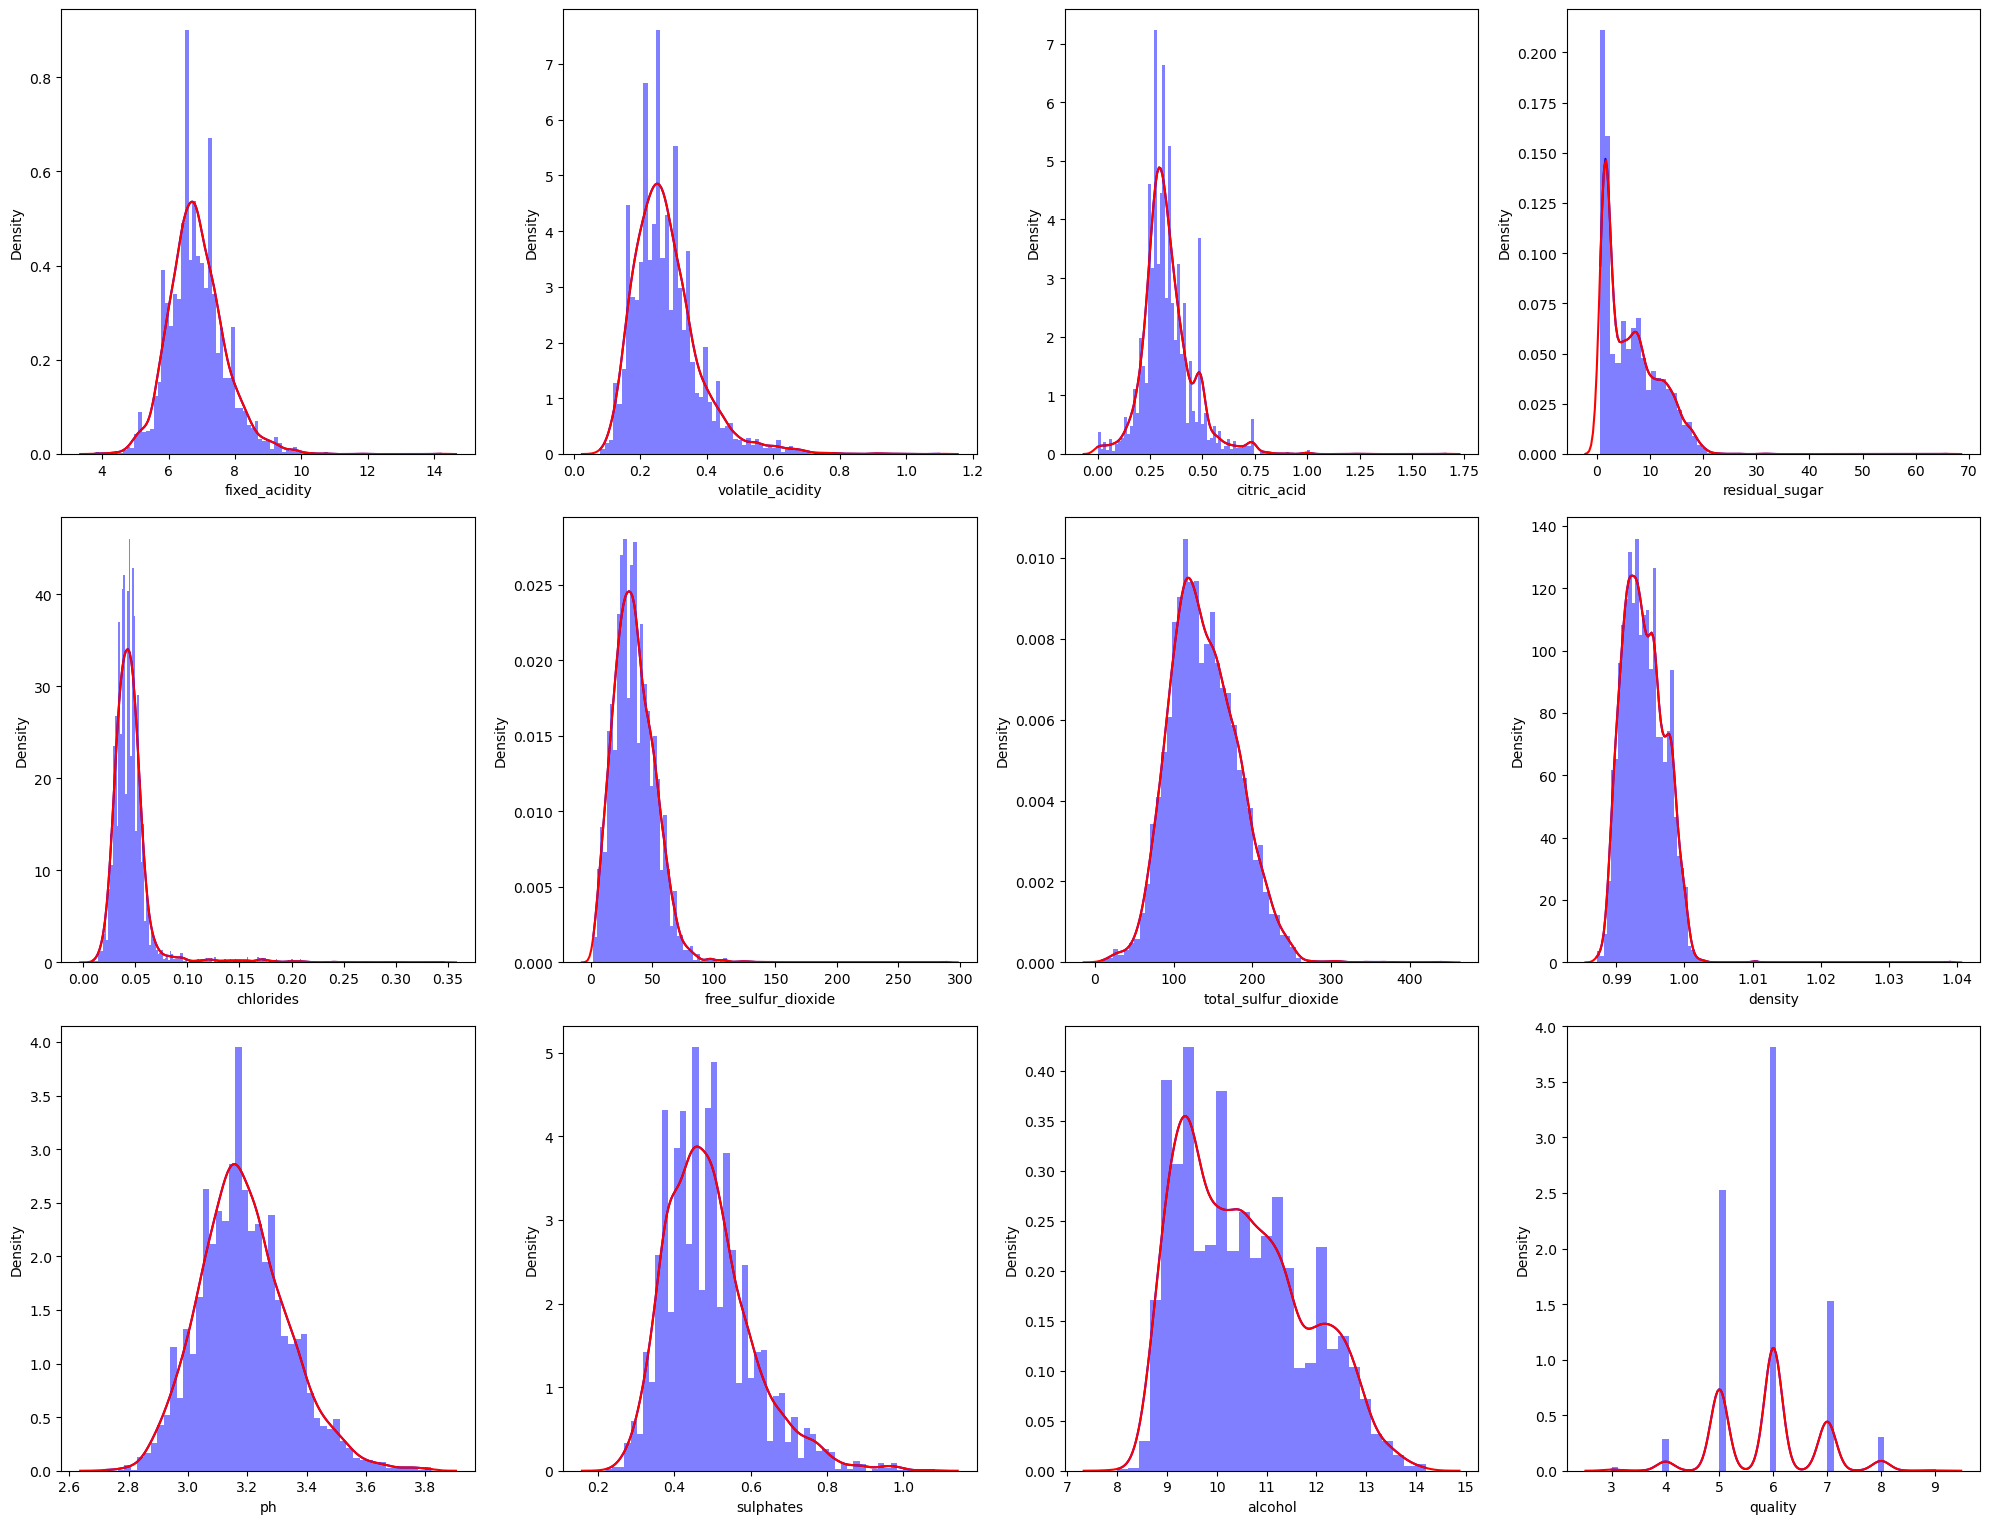

In [16]:
fig = plt.figure(figsize=[20, 20])
cols = wine_white.columns
count = 1
for col in cols:
    plt.subplot(4, 4, count)
    sns.histplot(wine_white[col], color="blue", kde=True, stat="density", linewidth=0)
    sns.kdeplot(wine_white[col], color="red", warn_singular=False)
    count+=1
plt.tight_layout()
plt.show()

##### 3.	Exclusão de outliers, caso necessário (sempre explicando a opção) e a quantidade final após a exclusão.

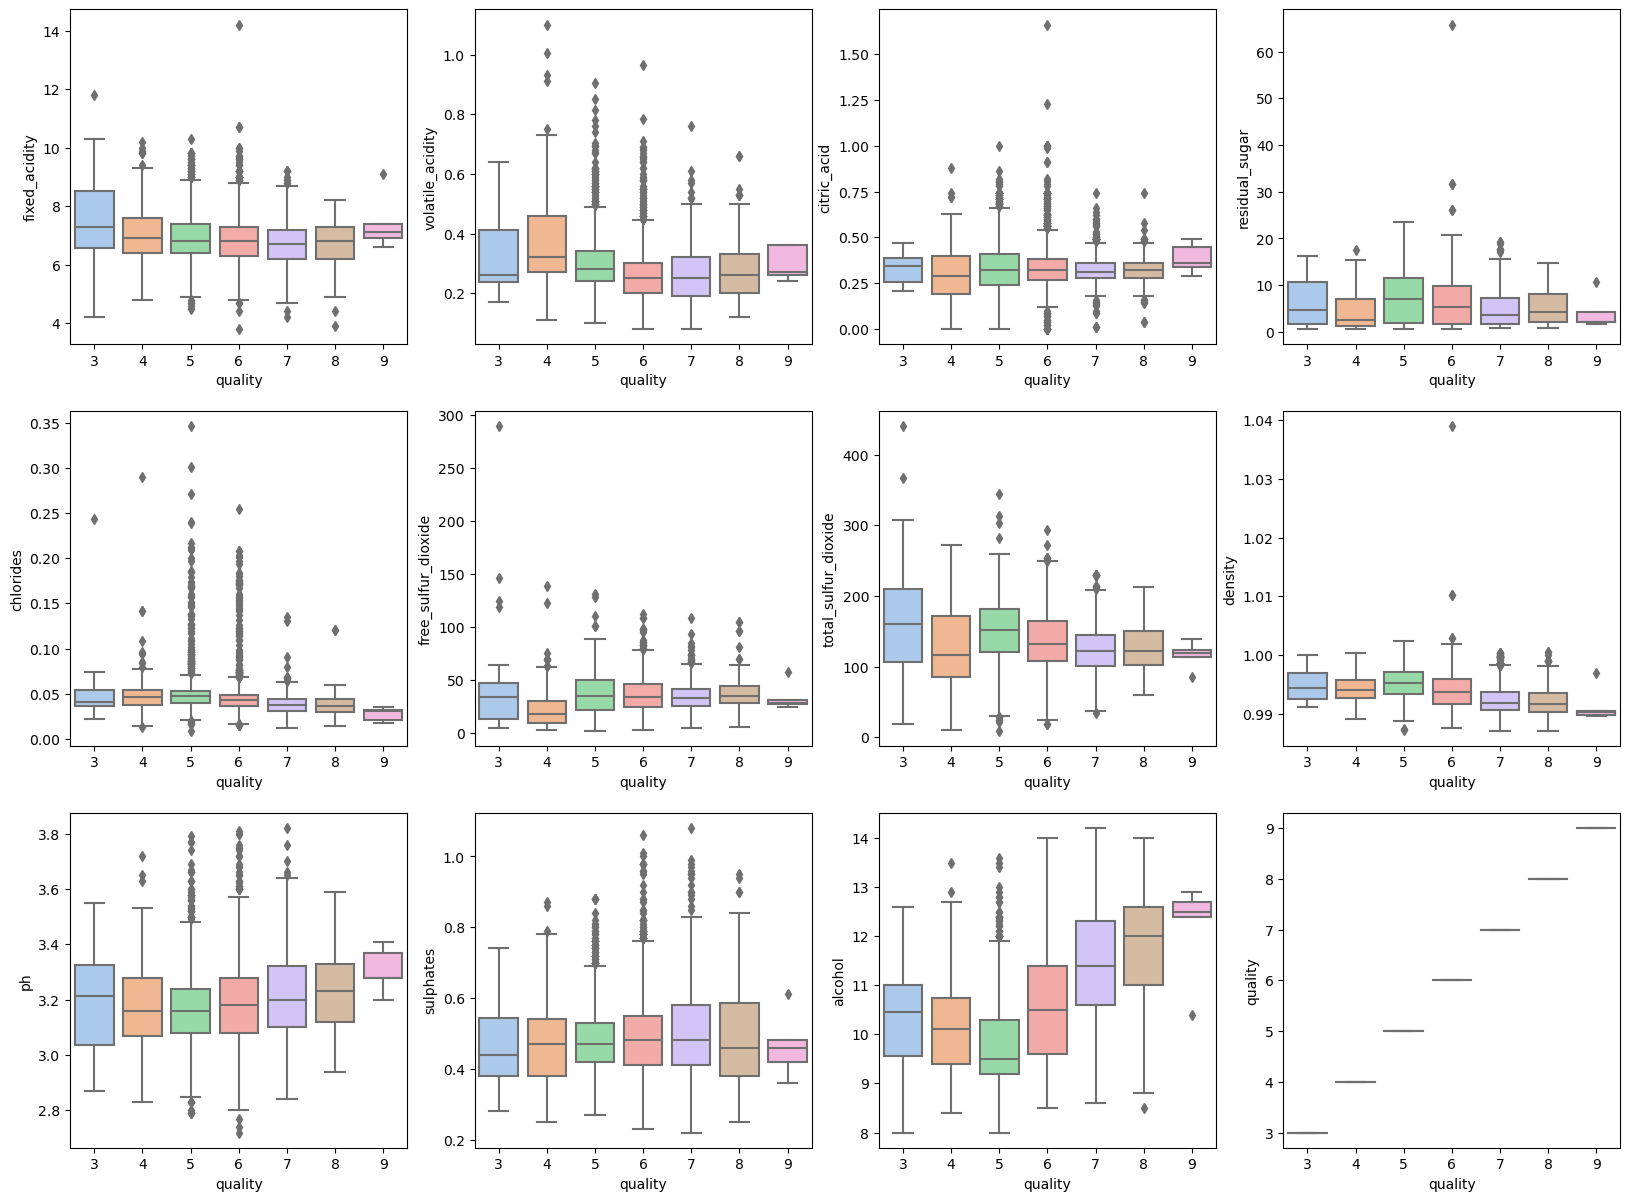

In [17]:
fig = plt.figure(figsize=[20, 20])
cols = wine_white.columns
count = 1
for col in cols:
    plt.subplot(4, 4, count)
    sns.boxplot(data=wine_white, x="quality", y=col, palette="pastel")
    count+=1
plt.show()

In [18]:
wine_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   ph                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [19]:
# wine_white = wine_white[(np.abs(stats.zscore(wine_white)) < 1).all(axis=1)]

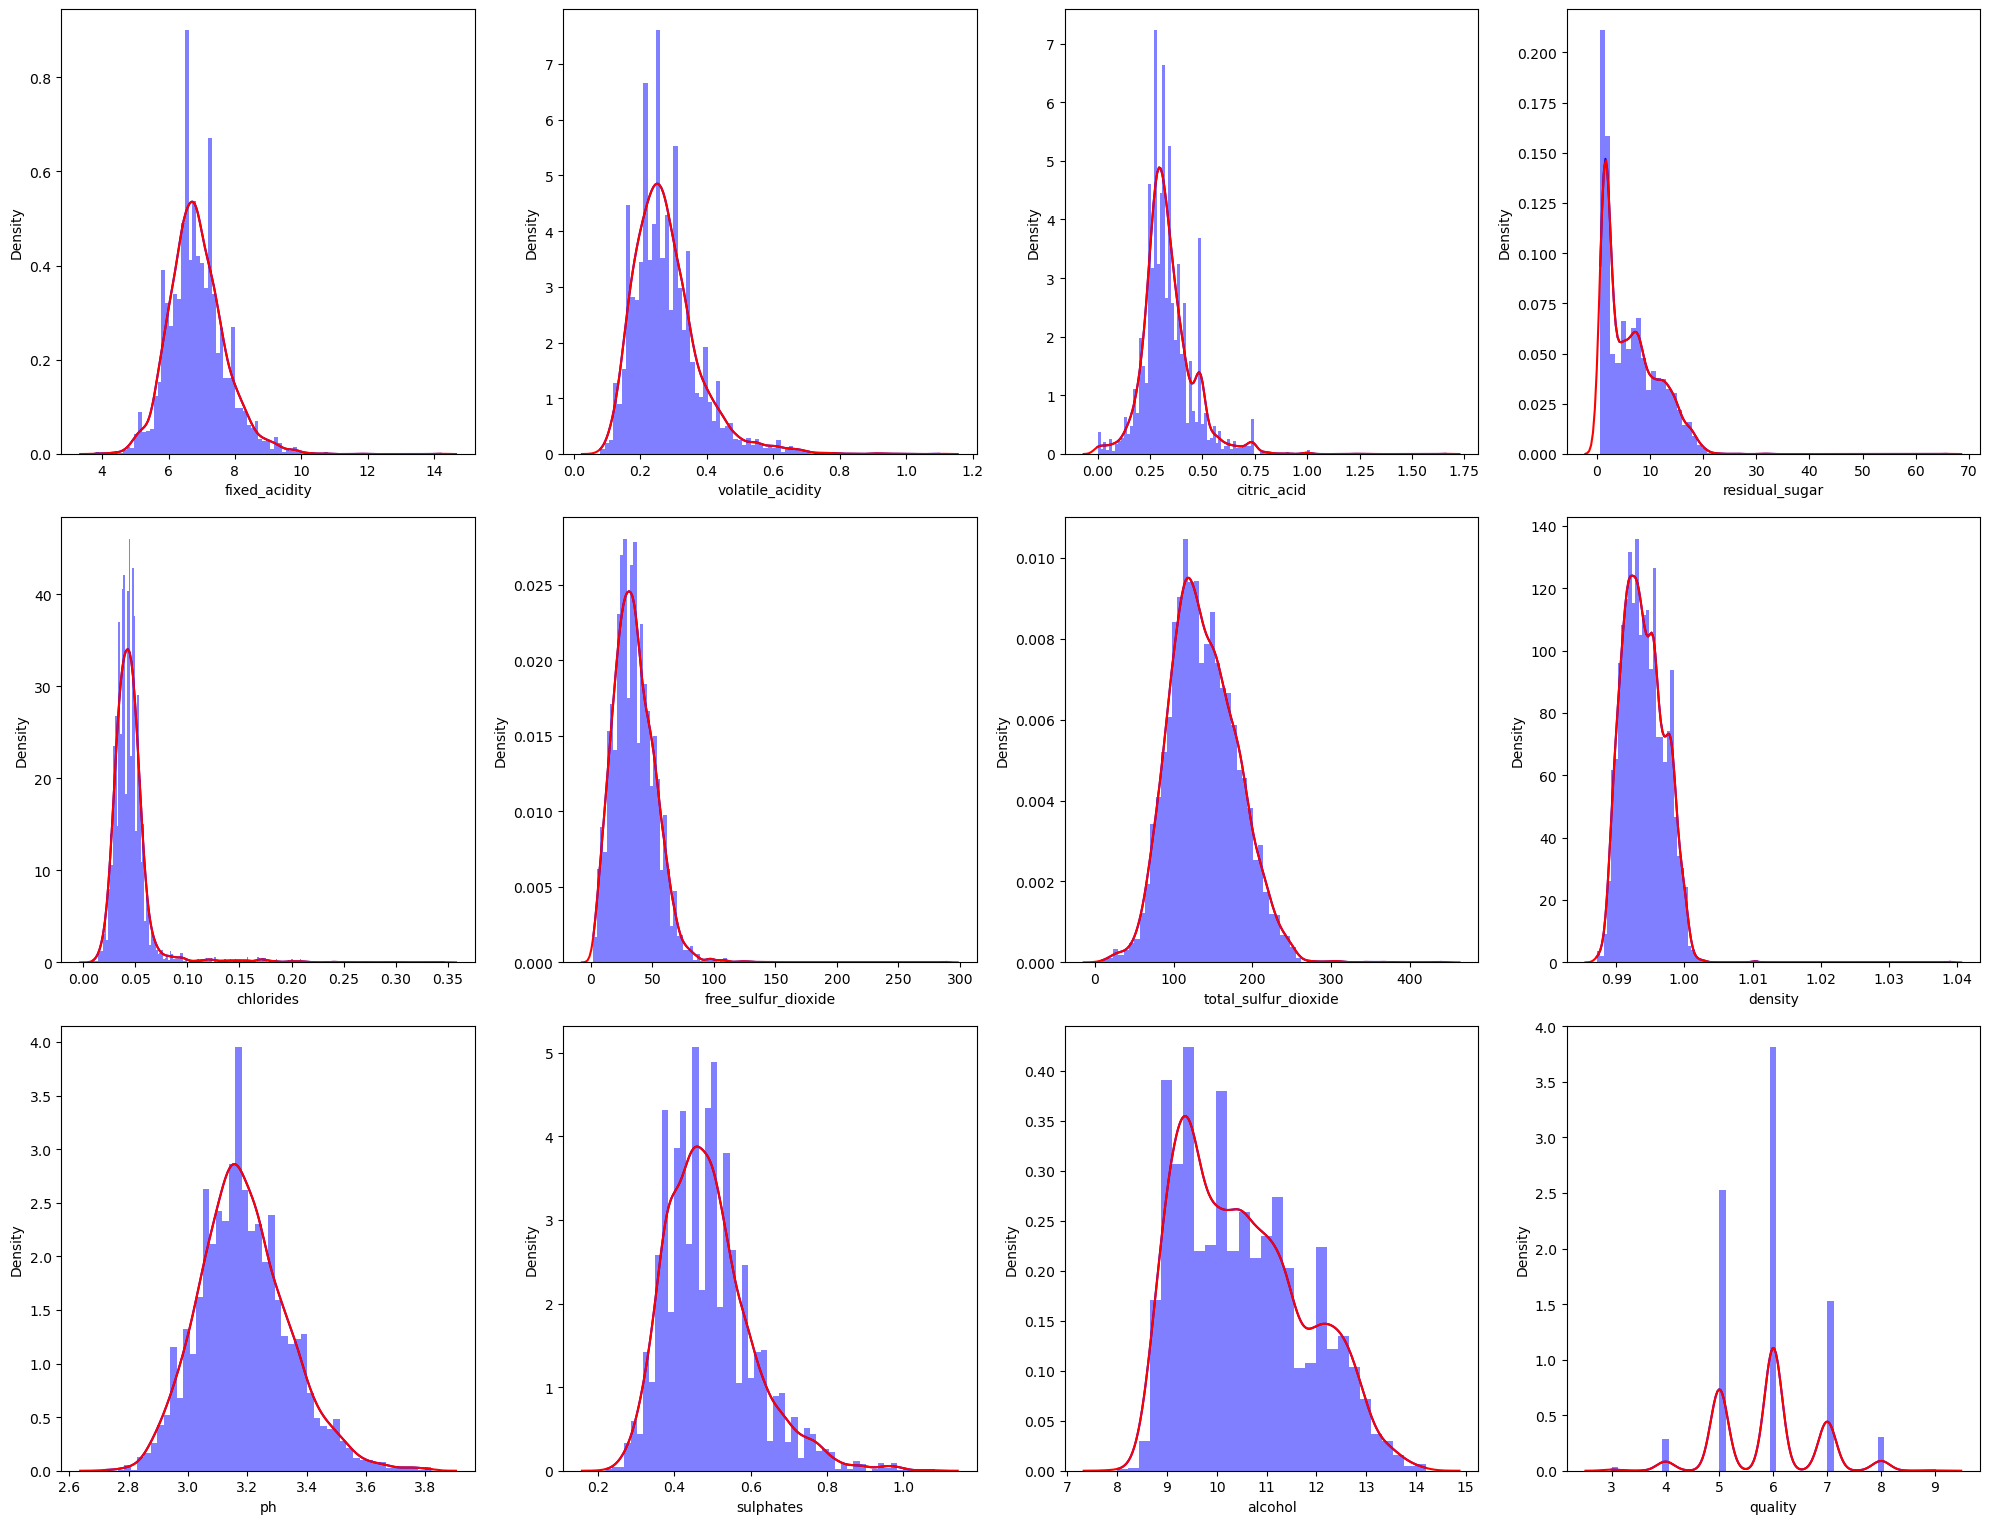

In [20]:
fig = plt.figure(figsize=[20, 20])
cols = wine_white.columns
count = 1
for col in cols:
    plt.subplot(4, 4, count)
    sns.histplot(wine_white[col], color="blue", kde=True, stat="density", linewidth=0)
    sns.kdeplot(wine_white[col], color="red", warn_singular=False)
    count+=1
plt.tight_layout()
plt.show()

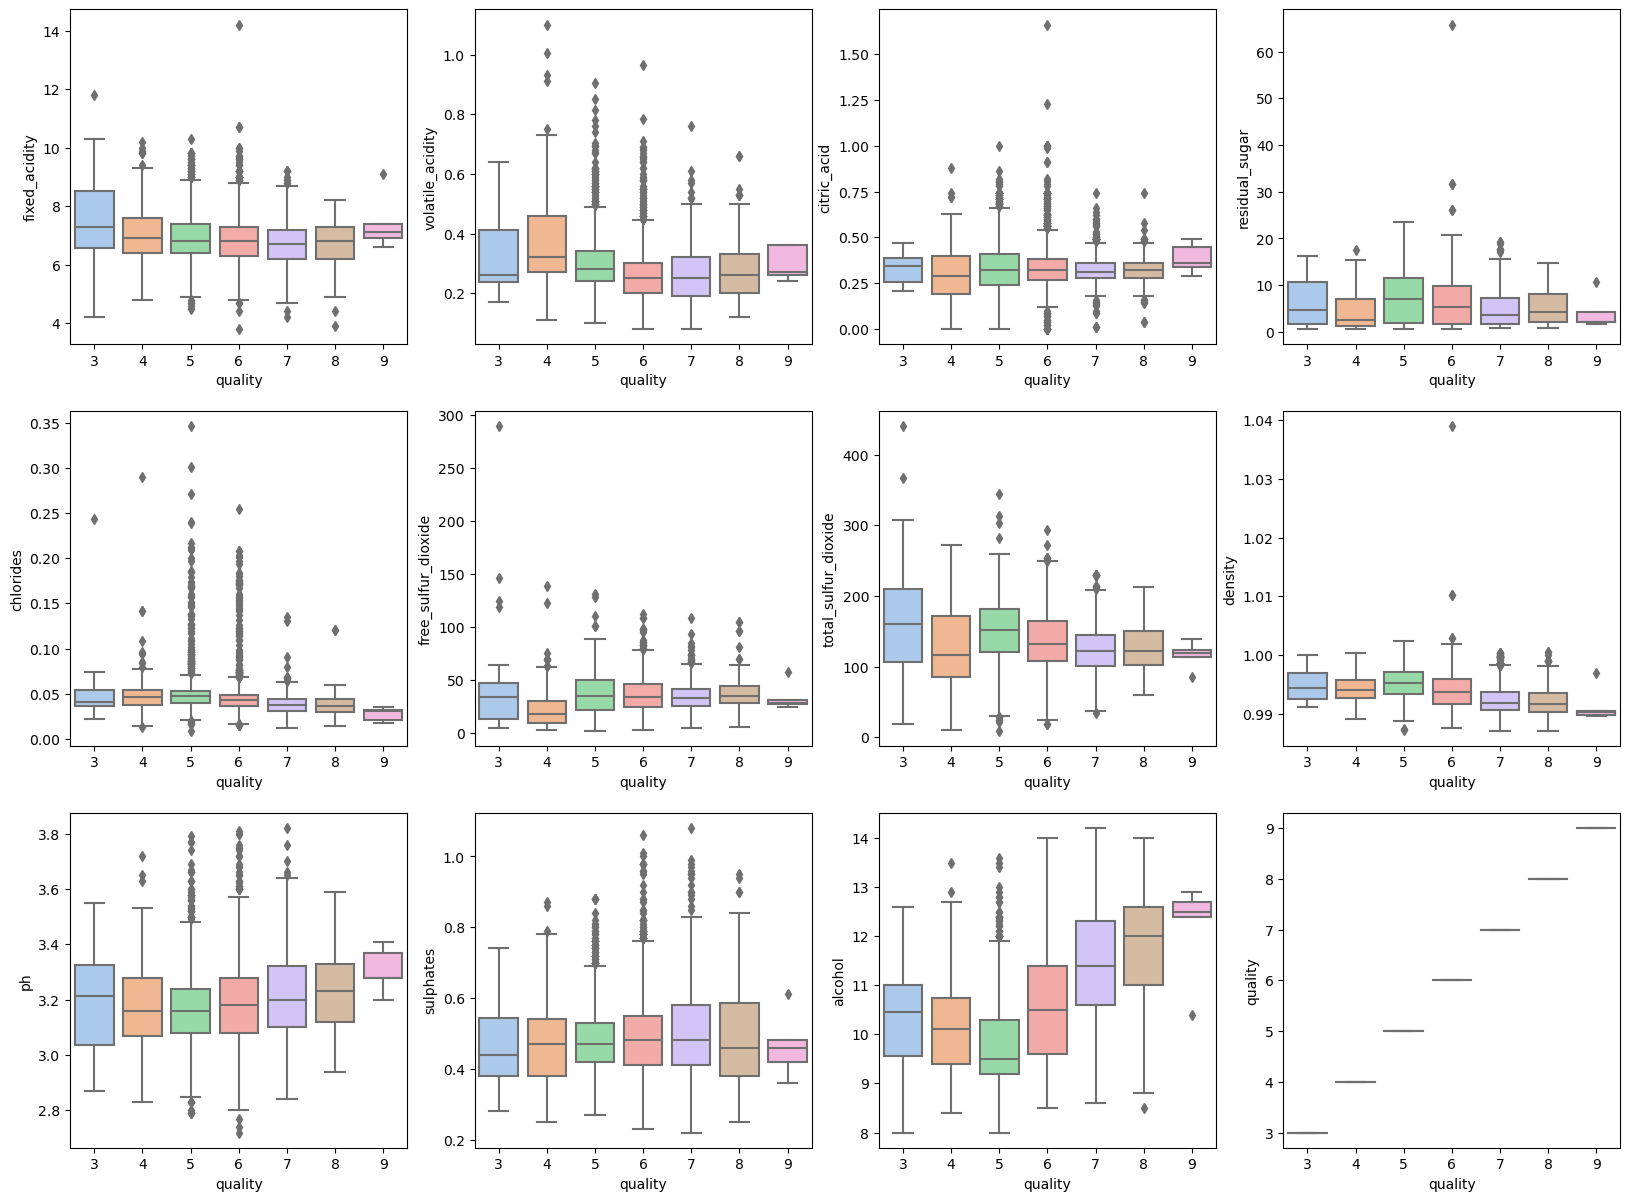

In [21]:
fig = plt.figure(figsize=[20, 20])
cols = wine_white.columns
count = 1
for col in cols:
    plt.subplot(4, 4, count)
    sns.boxplot(data=wine_white, x="quality", y=col, palette="pastel")
    count+=1
plt.show()

In [22]:
wine_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   ph                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


##### 4.	Amostra de Treinamento dos modelos e Validação 

In [23]:
X = wine_white.iloc[:, wine_white.columns != 'quality']

y = wine_white['quality']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

X_train.shape, X_test.shape

((3428, 11), (1470, 11))

#### 5.	Padronização dos dados, caso necessário

In [25]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

#### 7.	Com a métrica correta faça a comparação entre os diferentes algoritmos e qual foi o melhor entre eles.

In [26]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
pred = model_lr.predict(X_test)
accuracy=accuracy_score(y_test, pred)
print('Accuracy : ', 100 * accuracy)

Accuracy :  52.44897959183673


In [28]:
cm = confusion_matrix(y_test, pred)
print(cm)

[[  0   0   2   1   0   0   0]
 [  0   2  26  16   0   0   0]
 [  0   2 221 230   3   0   0]
 [  0   0 116 476  46   0   0]
 [  0   0  13 185  72   0   0]
 [  0   0   4  41  12   0   0]
 [  0   0   0   1   1   0   0]]


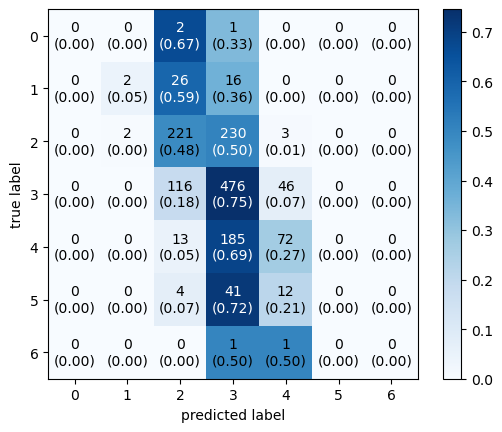

In [29]:
fig, ax = plot_confusion_matrix(conf_mat=cm,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [30]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.50      0.05      0.08        44
           5       0.58      0.48      0.53       456
           6       0.50      0.75      0.60       638
           7       0.54      0.27      0.36       270
           8       0.00      0.00      0.00        57
           9       0.00      0.00      0.00         2

    accuracy                           0.52      1470
   macro avg       0.30      0.22      0.22      1470
weighted avg       0.51      0.52      0.49      1470



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
model_svc = SVC(kernel="rbf")
model_svc.fit(X_train, y_train)

SVC()

In [32]:
pred = model_svc.predict(X_test)
accuracy=accuracy_score(y_test, pred)
print('Accuracy : ', 100 * accuracy)

Accuracy :  56.19047619047619


In [33]:
cm = confusion_matrix(y_test, model_svc.predict(X_test))
print(cm)

[[  0   0   1   2   0   0   0]
 [  0   2  25  17   0   0   0]
 [  0   1 259 196   0   0   0]
 [  0   0 115 505  18   0   0]
 [  0   0   7 203  60   0   0]
 [  0   0   0  44  13   0   0]
 [  0   0   0   1   1   0   0]]


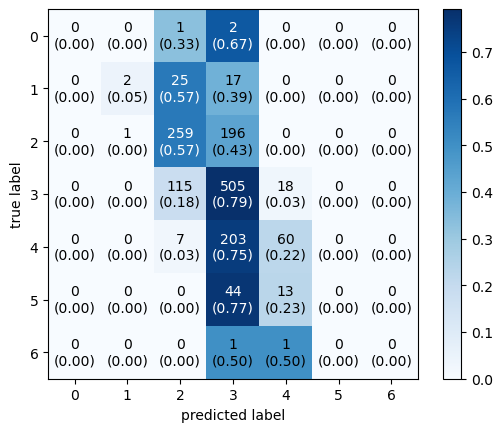

In [34]:
fig, ax = plot_confusion_matrix(conf_mat=cm,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [35]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.67      0.05      0.09        44
           5       0.64      0.57      0.60       456
           6       0.52      0.79      0.63       638
           7       0.65      0.22      0.33       270
           8       0.00      0.00      0.00        57
           9       0.00      0.00      0.00         2

    accuracy                           0.56      1470
   macro avg       0.35      0.23      0.24      1470
weighted avg       0.56      0.56      0.52      1470



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
model_knn = KNeighborsClassifier(n_neighbors=20)
model_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [37]:
pred = model_knn.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('Accuracy : ', 100 * accuracy)

Accuracy :  54.35374149659864


In [38]:
cm = confusion_matrix(y_test, pred)
print(cm)

[[  0   0   2   1   0   0   0]
 [  0   1  28  14   1   0   0]
 [  0   2 253 187  14   0   0]
 [  0   0 142 441  55   0   0]
 [  0   0  14 152 104   0   0]
 [  0   0   1  26  30   0   0]
 [  0   0   0   1   1   0   0]]


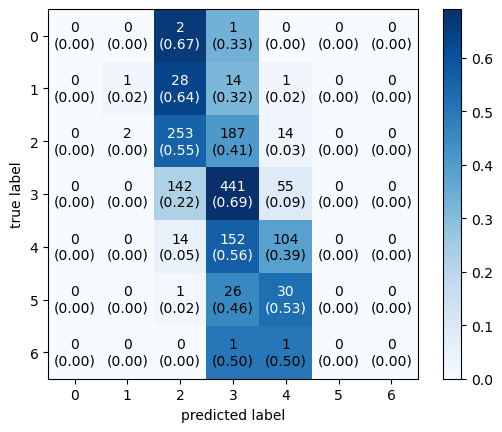

In [39]:
fig, ax = plot_confusion_matrix(conf_mat=cm,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [40]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.33      0.02      0.04        44
           5       0.57      0.55      0.56       456
           6       0.54      0.69      0.60       638
           7       0.51      0.39      0.44       270
           8       0.00      0.00      0.00        57
           9       0.00      0.00      0.00         2

    accuracy                           0.54      1470
   macro avg       0.28      0.24      0.24      1470
weighted avg       0.51      0.54      0.52      1470



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
wine_white_scaled = wine_white.apply(zscore)
wine_white_scaled.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152,0.13787
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276,0.13787
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667,0.13787
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203,0.13787
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203,0.13787


In [42]:

model = KMeans(n_clusters=2)
model

KMeans(n_clusters=2)

In [43]:
cluster_range=range(1,15)
cluster_error=[]
for a in cluster_range:
    cluster=KMeans(a,n_init=10)
    cluster.fit(wine_white_scaled)
    cluster_error.append(cluster.inertia_)
cluster_df=pd.DataFrame({'num_cluster':cluster_range,'cluster_error':cluster_error})
cluster_df

,num_cluster,cluster_error
0,1,58776.000000
1,2,47079.049648
2,3,43321.231688
3,4,40272.673255
4,5,37753.649958
5,6,35726.647714
6,7,34256.544466
7,8,33031.972676
8,9,31817.937815
9,10,30967.727166


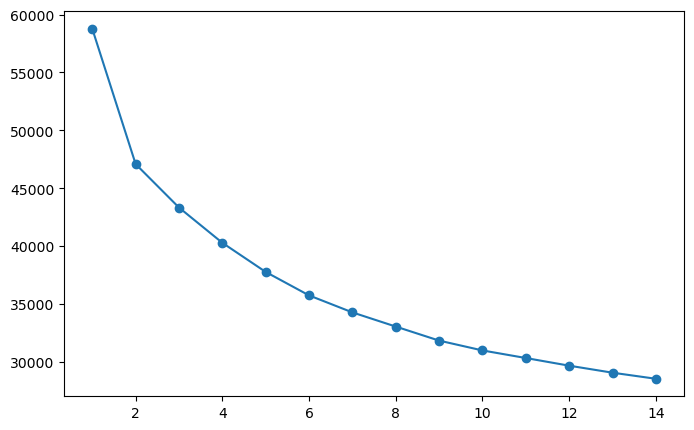

In [48]:
plt.figure(figsize=(8,5))
plt.plot(cluster_df['num_cluster'], cluster_df['cluster_error'], marker='o')

In [49]:
kmeans = KMeans(n_clusters=7, n_init=15, random_state=4)

In [51]:
kmeans.fit(wine_white_scaled)

KMeans(n_clusters=7, n_init=15, random_state=4)

In [53]:
centroids = kmeans.cluster_centers_
pd.DataFrame(centroids, columns=wine_white_scaled.columns)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
0,-0.167711,0.002406,-0.060910,0.473865,0.072756,1.118657,1.159873,0.615212,0.072226,0.028240,-0.639121,-0.457700
1,-0.529204,-0.608345,-0.135700,-0.576605,-0.162862,-0.127812,-0.241366,-0.367859,0.959338,0.589330,0.132782,0.345670
2,1.011538,-0.354884,0.348004,-0.536096,-0.226425,-0.594458,-0.554697,-0.378012,-0.692580,-0.234436,0.261395,-0.237260
3,-0.194951,0.319452,0.960245,-0.359834,5.442153,0.322437,0.129740,0.110866,-0.605181,-0.230924,-0.756421,-0.432234
4,-0.268134,1.338697,-0.981586,-0.268500,0.198555,-0.674108,-0.245010,0.084974,0.055028,-0.263591,-0.545713,-0.984212
5,-0.486152,0.358298,-0.195301,-0.476295,-0.548041,-0.306458,-0.647109,-1.127873,0.120115,-0.331168,1.425988,0.961777
6,0.430201,-0.126650,0.532656,1.573304,0.167803,0.368017,0.575453,1.462438,-0.559341,0.086715,-0.994265,-0.122613


In [54]:
wine_white_scaled['class'] = kmeans.labels_.astype('object')

In [55]:
wine_white_scaled.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,class
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152,0.13787,6
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276,0.13787,1
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667,0.13787,2
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203,0.13787,0
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203,0.13787,0


In [56]:
df_k=wine_white_scaled

In [57]:
df_k['class']=df_k['class'].astype('object')

In [58]:
from mpl_toolkits.mplot3d import Axes3D

C:\Users\m4rk0\AppData\Local\Temp\ipykernel_19800\1200516898.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=100)
C:\Users\m4rk0\AppData\Local\Temp\ipykernel_19800\1200516898.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ax.scatter(wine_white_scaled.iloc[:, 0], wine_white_scaled.iloc[:, 1], win

Text(0.5, 0.92, '3D plot of KMeans Clustering')

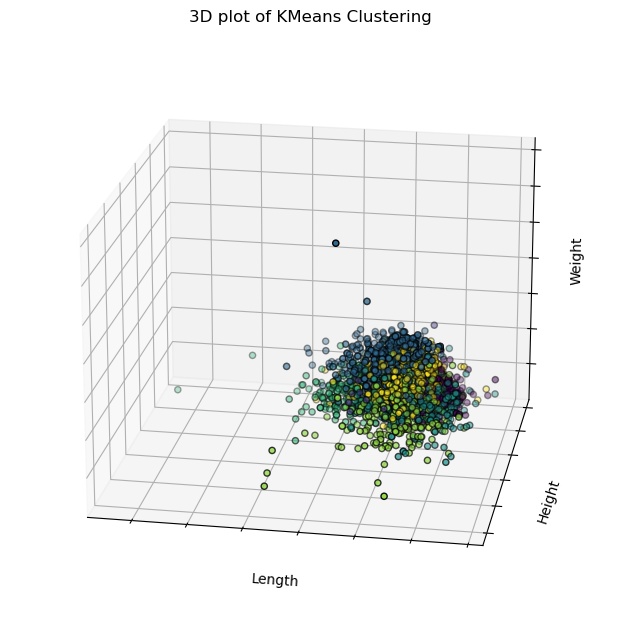

In [59]:
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=100)
kmeans.fit(wine_white_scaled)
labels = kmeans.labels_
ax.scatter(wine_white_scaled.iloc[:, 0], wine_white_scaled.iloc[:, 1], wine_white_scaled.iloc[:, 3],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
ax.set_title('3D plot of KMeans Clustering')

https://www.kaggle.com/code/vigneshprakash/red-wine-data-eda-clustering-and-classification
https://www.kaggle.com/code/gireeshs/complete-guide-to-clustering-techniques
https://www.kaggle.com/code/sinansonmez35/kmeans-clustering-of-wines
https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009/code?datasetId=4458&searchQuery=cluster